
{% include toc title="In This Lesson" icon="file-text" %}

A well documented scientific workflow is valuable because it makes it easier
for us all to build off of each other's work. Below you will consider the elements
of a well-documented workflow using Jupyter Notebooks.

<div class='notice--success' markdown='1'>

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* List some of the components of a project that make it more easily re-usable (reproducible) to you when working with other people

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this activity.

</div>

## A Data Report

Your colleague put together the very informative data report below. The topic of the report is the 2013 Colorado floods. Examine the report. Then answer the questions below.

1. What sources of data were used to create the plots?

2. How were the data processed?

3. How did your colleague generate this report? When was it last updated?

4. Who contributed to this report?

5. You'd like to make some changes to the report - can you do that easily? If you wanted to make changes, what process and tools would you use to make those changes?

6. What units are the precipitation data in?

7. Create a list of the things that would make editing this report easier.

***


## My Report - 2013 Colorado Flood Data

Precipitation Data

A lot of rain impacted Colorado. See below.


In [2]:
# load all packages you will need in the first cell of code
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import earthpy as et

register_matplotlib_converters()
sns.set(font_scale=1.5, style="white")

# Download the data and change home directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
data1 = et.data.get_data("co-flood-extras")
data2 = et.data.get_data("colorado-flood")

In [3]:
# import precip data into a pandas dataframe
boulder_precip = pd.read_csv(
    'data/colorado-flood/precipitation/805325-precip-daily-2003-2013.csv')

In [4]:
boulder_precip.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


In [5]:
# convert to date/time and retain as a new field
boulder_precip['DateTime'] = pd.to_datetime(boulder_precip['DATE'])
# assign NoData values to NA
boulder_precip = boulder_precip.replace(999.99, np.NaN)
precip_boulder_subset = boulder_precip[['DateTime', 'HPCP']]
precip_boulder_subset = precip_boulder_subset.set_index(
    pd.DatetimeIndex(precip_boulder_subset['DateTime']))
precip_boulder_daily = precip_boulder_subset.resample(
    'D').sum()  # aggregate by day, sum to get daily totals

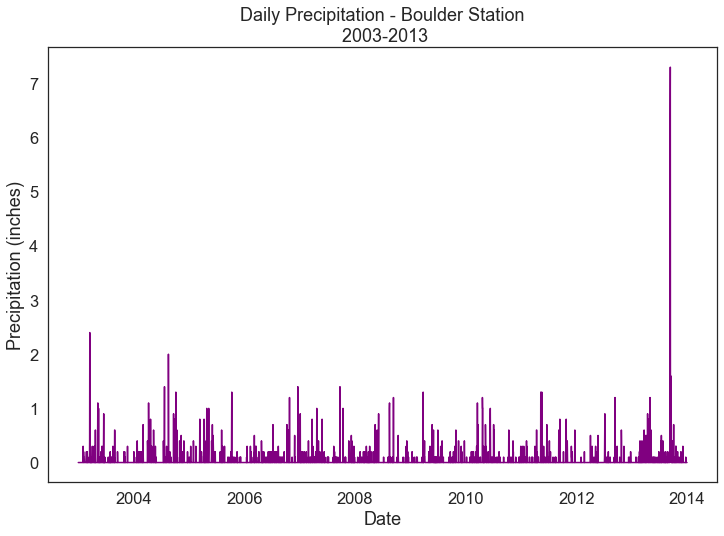

In [6]:
# plot the data
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(precip_boulder_daily.index.values,
        precip_boulder_daily['HPCP'], color='purple')
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Daily Precipitation - Boulder Station\n 2003-2013")
plt.show()



## Fall 2013 Precipitation



Let's check out the data for a few months.






In [7]:
# work with DateTime column to filter dates, but this column is the index of the dataframe
# so using .loc to filter index values to subset 2 months around flood
precip_boulder_daily_augoct = precip_boulder_daily.loc['2013-08-15': '2013-10-15']

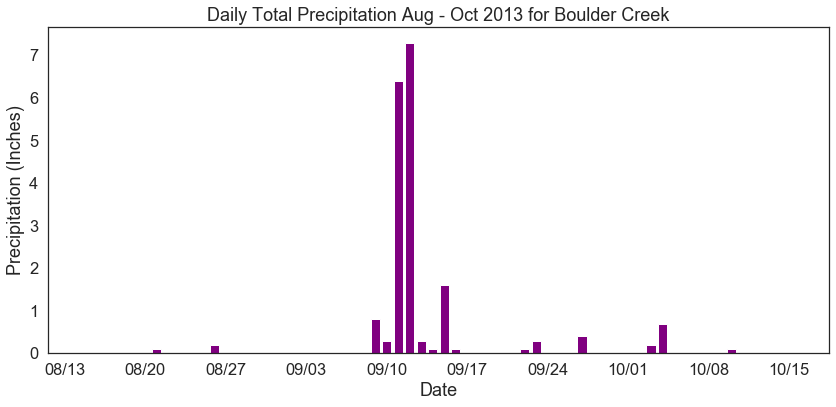

In [8]:
# Define the date format
myFmt = DateFormatter("%m/%d")

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(precip_boulder_daily_augoct.index.values, precip_boulder_daily_augoct['HPCP'],
       color="purple")
ax.set(xlabel="Date", ylabel="Precipitation (Inches)")
ax.set(title="Daily Total Precipitation Aug - Oct 2013 for Boulder Creek")
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(myFmt)
plt.show()

In [9]:
# download the data from http://ndownloader.figshare.com/files/7271003
# read in data and import precip data into a pandas dataframe
precip_boulder_all = pd.read_csv(
    'data/colorado-flood/precipitation/805333-precip-daily-1948-2013.csv')

In [10]:
# assign NA values to do data
precip_boulder_all = precip_boulder_all.replace(999.99, np.NaN)

In [11]:
# format date/time
precip_boulder_all['DateTime'] = pd.to_datetime(precip_boulder_all['DATE'])

# aggregate by month, and sum daily to get monthly totals

precip_boulder_all_subset = precip_boulder_all[['DateTime', 'HPCP']]
precip_boulder_all_subset = precip_boulder_all_subset.set_index(
    pd.DatetimeIndex(precip_boulder_all_subset['DateTime']))
precip_boulder_all_monthly = precip_boulder_all_subset.resample('M').sum()

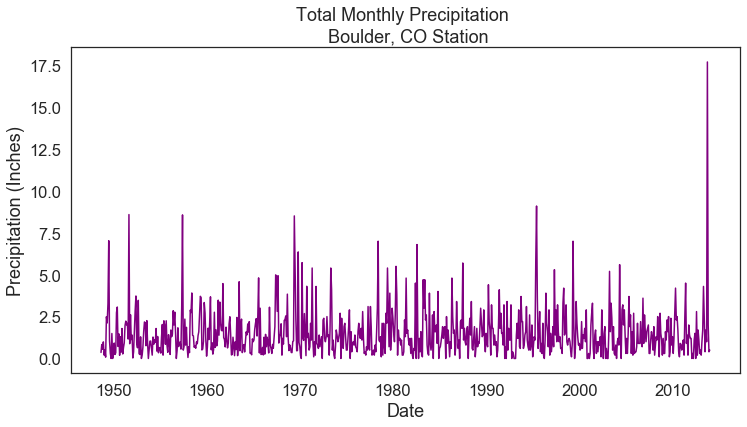

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(precip_boulder_all_monthly.index.values, precip_boulder_all_monthly['HPCP'],
        color="purple")

ax.set(xlabel="Date", ylabel="Precipitation (Inches)")
ax.set(title="Total Monthly Precipitation \n Boulder, CO Station")
plt.show()